## 피마인디언 당뇨병 데이터셋 - PCA

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### 데이터 탐색 /불러오기

In [13]:
diabetes_df = pd.read_csv('../00.data/diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [14]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 데이터 전처리

In [17]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 비율은 {zero_count/768:.4f}')

Glucose 0 건수는 5, 비율은 0.0065
BloodPressure 0 건수는 35, 비율은 0.0456
SkinThickness 0 건수는 227, 비율은 0.2956
Insulin 0 건수는 374, 비율은 0.4870
BMI 0 건수는 11, 비율은 0.0143


In [18]:
# 평균값으로 데체
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0,diabetes_df[zero_features].mean())

In [19]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diabetes_std = scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [22]:
diabetes_pca = pca.fit_transform(diabetes_std)

In [23]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.27606032, 0.20283564]), 0.47889595613196856)

### 시각화

In [24]:
diabetes_pca_df = pd.DataFrame(diabetes_pca, columns=['PC1','PC2'])
diabetes_pca_df['Outcome'] = y
diabetes_pca_df.head()

,PC1,PC2,Outcome
0,1.409153,-0.733975,1
1,-1.485388,0.281229,0
2,0.088633,-1.033262,1
3,-1.935771,0.493247,0
4,1.197622,3.533308,1


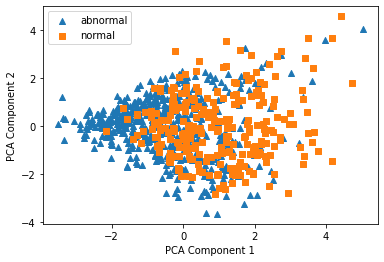

In [25]:
markers = ['^','s']
status = ['normal','abnormal']

for i, marker in enumerate(markers):
    x_data = diabetes_pca_df[diabetes_pca_df['Outcome']==i]['PC1']
    y_data = diabetes_pca_df[diabetes_pca_df['Outcome']==i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=status[y[i]])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 분류 비교

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 1) PCA 전

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_std, y, stratify=y, random_state=2021
)

In [28]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.6979166666666666

### 2) PCA 후

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_pca, y, stratify=y, random_state=2021
)

In [31]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.6770833333333334